# P-Value

The p-value is defined as the probabily, under the null hypotheis H *being true*, of obtaining a result equal to or more extreme **than what was actually observed**.

[Sidenote: PRINTING LATEX](http://nbviewer.jupyter.org/github/ipython/ipython/blob/2.x/examples/Notebook/Display%20System.ipynb#LaTeX)

The smaller the p-value, the higher the significance because it tells the investigator that the hypothesis under consideration (*null hypothesis*) may not adequately explain the observation. 

The fixed pre-defined *Alpha* level can be interpreted as the rate of falsely rejecting the null hypothesis (or type I error), since **Pr(Reject H_0 | H_0) = Pr(p <= *Alpha* | H_0) = *Alpha* **  

Alpha is a defined probability, an established desired rate...

We evaluate whether the p-value, an actual probability of the real world (not establilshed/defined), is equal or less (ideally) than Alpha.

We wonder whether the probability of getting a result equal or as extreme as the one gotten (assuming null H true) is equal or less than Alpha (the established rate of having results as extreme once in a while even though the null hypothesis is true)

## Usage

The p-value is widely used in statistical hypothesis testing, specifically in null hypothesis significance testing. In this method, as part of experimental design, before performing the experiment, one first chooses a model (the null hypothesis) and a threshold value for p, called the significance level of the test, traditionally 5% or 1% [5] and denoted as α. *If the p-value is less than the chosen significance level (α), that **suggests that the observed data is sufficiently inconsistent with the null hypothesis that the null hypothesis may be rejected.** * However, that does not prove that the tested hypothesis is true. When the p-value is calculated correctly, this test guarantees that the Type I error rate is at most α. For typical analysis, using the standard α = 0.05 cutoff, the null hypothesis is rejected when p < .05 and not rejected when p > .05. The p-value does not, in itself, support reasoning about the probabilities of hypotheses but is only a tool for deciding whether to reject the null hypothesis.

## Practice question: Was there a significant difference between the mean age of children who survived and the mean age of children who did not survive? Or in terms of fare paid?

In [13]:
#import useful packages
import pandas as pd
#pd.set_option('max_rows',10)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
%matplotlib inline

# Read data
titanic_dataframe = pd.read_csv('../Data/train.csv')

# Print dimmensions
print('Dimmensions', titanic_dataframe.shape)

# Function for printing out some statistics
def print_stats(list):
    print('count:', len(list))
    print('mean:', np.mean(list))
    print('std:', np.std(list,ddof=1),"\n")
    


Dimmensions (891, 12)


In [14]:
titanic_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# children separated by survival
survivors_children_dataframe = titanic_dataframe.loc[(titanic_dataframe['Age'] <= 12) & (titanic_dataframe['Survived'] == 1)]
not_surivors_children_dataframe = titanic_dataframe.loc[(titanic_dataframe['Age'] <= 12) & (titanic_dataframe['Survived'] == 0)]

In [28]:
#print stats for each category
print('-- Children Who survived: Age --')
print_stats(survivors_children_dataframe['Age'])
print('-- Children Who NOT Survived: Age ')
print_stats(not_surivors_children_dataframe['Age'])

-- Children Who survived: Age --
count: 40
mean: 3.87925
std: 3.0044039363608404 

-- Children Who NOT Survived: Age 
count: 29
mean: 6.0
std: 3.555679561329612 



On a first impression, the means suggest that priority was given to babies...

But are these differences due to chance or are they statistically significant differences?

First: Survived
Second: Not Survived


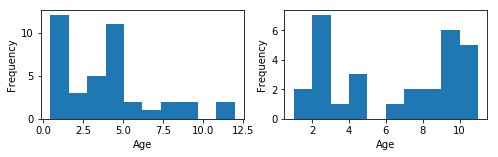

In [46]:
# Make some histograms grouped by survival
fig, axs = plt.subplots(1,2,figsize=(8,2))
axs[0].hist(survivors_children_dataframe['Age']);
axs[1].hist(not_surivors_children_dataframe['Age']);
for ax in axs.flat:
    ax.set(xlabel='Age', ylabel='Frequency')
print('First: Survived')
print('Second: Not Survived')

Variation in Children Who Survived


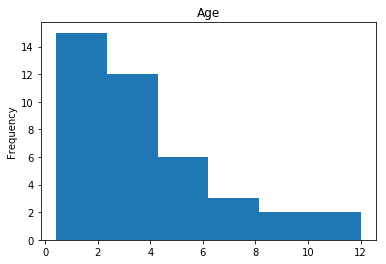

Variation in Children Who NOT Survived


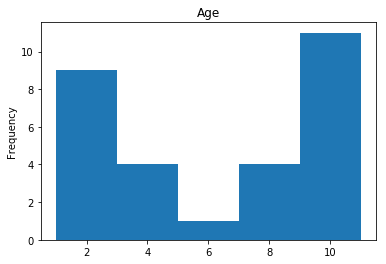

In [83]:
# Choose category to examine:
category = 'Age'

def histogramplot(column_name, dataframe,nbins):
    #plots a histogram and prints the frequency
    plt.figure()
    dataframe[column_name].plot.hist(bins = nbins, figsize = (6,4))
    plt.title(column_name)
    plt.show()
    #headers = [column_name,'Frequency']
    #print(headers)
    #print(stats.itemfreq(titanic_dataframe[column_name]))
    
print('Variation in Children Who Survived')
histogramplot(category, survivors_children_dataframe,6)
print('Variation in Children Who NOT Survived')
histogramplot(category, not_surivors_children_dataframe,5)



My Hypothesis is that there is a statistically significant difference.

H_A: Mean of Children Who Survived != Mean of Children Who Did Not Survive

H_A: Mean of Children Who Survived == Mean of Children Who Did Not Survive

(Although I'm thinking an explanation for this could be that parents prefered not to take kids at a problematic age such as 6 years old. Babies because they had to. Above 10 because they are able to reason better...) So, perhaps, there where not so many kids around 6 years old

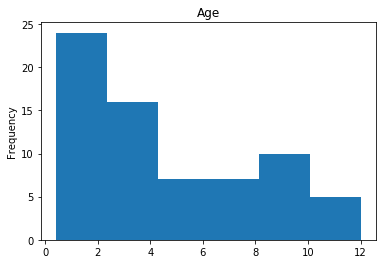

In [95]:
# Let's actually check the distribution of children by age
all_children_dataframe = titanic_dataframe.loc[titanic_dataframe['Age'] <= 12]
histogramplot('Age', all_children_dataframe,6)

So, there were certainly more babies, although it doesn't seem that there where specially more 10 years old than 6 years old. Which makes it very weird/particular that the distribution of age in children who did not survived is definetely bimodal 

In [97]:
def difference_of_means_test(data1,data2,tails):
    n1 = len(data1)
    n2 = len(data2)
    
    x1 = np.mean(data1)
    x2 = np.mean(data2)
    
    s1 = np.std(data1,ddof=1) # Bessel's correction: use n - 1 in denominator
    s2 = np.std(data2,ddof=1)
    
    SE = np.sqrt(s1**2/n1 + s2**2/n2)
    Tscore = np.abs((x2-x1))/SE
    df = min(n1,n2) - 1 # conservative estimate. Review OpenIntro
    pvalue = tails * stats.t.cdf(-Tscore,df)
    
    SDpooled = np.sqrt((s1**2*(n1-1) + s2**2*(n2-1)) / (n1+n2-2))
    Cohensd = (x2 - x1) / SDpooled
    
    print('p = ', pvalue)
    print('d = ', Cohensd)

In [98]:
difference_of_means_test(survivors_children_dataframe['Age'], not_surivors_children_dataframe['Age'],2)

p =  0.0144683553951
d =  0.653303382193


**So,I guess this means that the difference of means is  statistically significant** 

# Now, what about practical significance?

Cohens d in the previosu step stands for the measure of the effect size i.e., practical significance.

In [99]:
# Documentation
#http://www.introspective-mode.org/practical-significance-effect-size/

The table below contains descriptors for magnitudes of d = 0.01 to 2.0, as initially suggested by Cohen and expanded by Sawilowsky.[16]

Effect size | d | Reference
--- | --- | ---
Very small | 0.01 | Sawilowsky, 2009
Small | 0.20 | Cohen, 1988
Medium | 0.50 | Cohen, 1988
Large | 0.80 | Cohen, 1988
Very large | 1.20 | Sawilowsky, 2009
Huge | 2.0 | Sawilowsky, 2009


** Our effect sisze (d=0.65) is in the classification of being from Medium to Large**